In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
n = 100

In [3]:
dogw = norm(80, 20).rvs(n)
horw = norm(130, 20).rvs(n)
weights = np.hstack((dogw, horw))

In [4]:
dogh = norm(20, 10).rvs(n)
horh = norm(50, 10).rvs(n)
heights = np.hstack((dogh, horh))

In [5]:
targets = np.hstack((np.zeros(n), np.ones(n)))
matrix = np.vstack((weights, heights, targets)).T
np.random.shuffle(matrix)

In [6]:
matrix[:10]

array([[ 83.94069612,   6.90176055,   0.        ],
       [141.50918843,  29.42986343,   1.        ],
       [ 91.87271976,  28.96798877,   0.        ],
       [ 83.98149142,  19.43348062,   0.        ],
       [130.36480964,  55.58425678,   1.        ],
       [154.47288061,  43.56014554,   1.        ],
       [149.61570089,  44.50328717,   1.        ],
       [100.38145841,  21.78285869,   0.        ],
       [143.76233737,  50.91646169,   1.        ],
       [110.88876809,  55.31771789,   1.        ]])

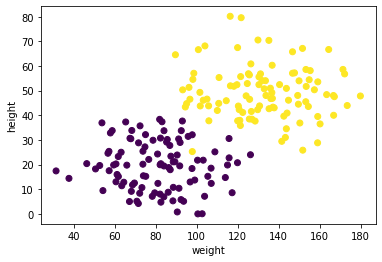

In [7]:
plt.scatter(matrix[:,0], matrix[:,1], c=matrix[:,2])
plt.xlabel('weight')
plt.ylabel('height');

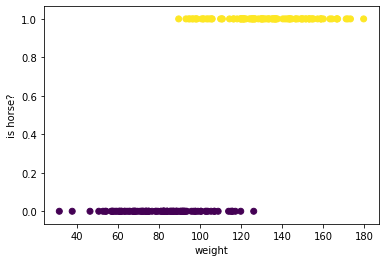

In [8]:
plt.scatter(matrix[:,0], matrix[:,2], c=matrix[:,2])
plt.xlabel('weight')
plt.ylabel('is horse?');

In [9]:
model = LinearRegression().fit(matrix[:,0].reshape(-1,1), matrix[:,2])
β1 = model.coef_[0]
β0 = model.intercept_

In [10]:
xs = np.linspace(50, 175)
ys = model.predict(xs.reshape(-1, 1))

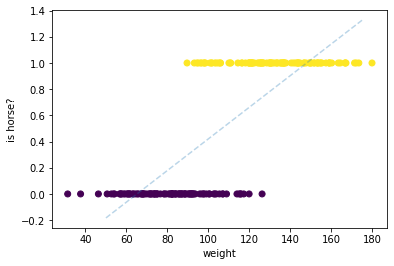

In [11]:
plt.scatter(matrix[:,0], matrix[:,2], c=matrix[:,2])
plt.plot(xs, ys, '--', alpha=0.3)
plt.xlabel('weight')
plt.ylabel('is horse?');

In [12]:
ys1 = 1 / (1 + np.exp(-1 * (β0 + (β1 * xs))))

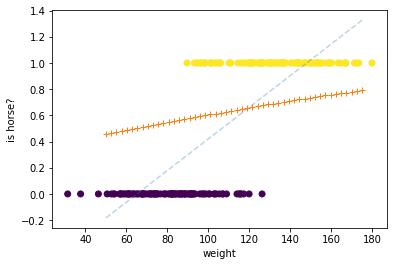

In [13]:
plt.scatter(matrix[:,0], matrix[:,2], c=matrix[:,2])
plt.plot(xs, ys, '--', alpha=0.3)
plt.plot(xs, ys1, '+')
plt.xlabel('weight')
plt.ylabel('is horse?');

In [14]:
lr = LogisticRegression().fit(matrix[:,0].reshape(-1,1), matrix[:,2])

/home/chyld/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
b1 = lr.coef_[0][0]
b0 = lr.intercept_[0]

In [16]:
ys2 = 1 / (1 + np.exp(-1 * (b0 + (b1 * xs))))

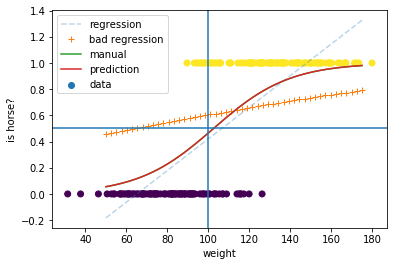

In [17]:
plt.scatter(matrix[:,0], matrix[:,2], c=matrix[:,2], label='data')
plt.plot(xs, ys, '--', alpha=0.3, label='regression')
plt.plot(xs, ys1, '+', label='bad regression')
plt.plot(xs, ys2, label='manual')
plt.plot(xs, lr.predict_proba(xs.reshape(-1,1))[:,1], label='prediction')
plt.axhline(.5)
plt.axvline(100)
plt.xlabel('weight')
plt.ylabel('is horse?')
plt.legend();

In [18]:
preds = lr.predict(matrix[:,0].reshape(-1,1))

In [19]:
tn, fp, fn, tp = confusion_matrix(matrix[:,2], preds).ravel()

In [20]:
confusion_matrix(matrix[:,2], preds)

array([[86, 14],
       [12, 88]])

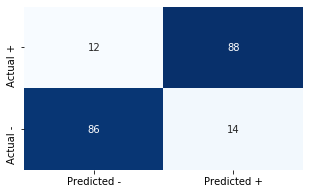

In [21]:
plt.figure(figsize=(5, 3))
sns.heatmap(
    pd.DataFrame([[fn,tp], [tn, fp]], 
                 columns=['Predicted -', 'Predicted +'], 
                 index=['Actual +', 'Actual -']),
    annot=True,
    cbar=False,
    cmap='Blues'
)
plt.show()

In [24]:
# calculate precision, accuracy, recall

In [25]:
# ^^^ manually and with fns

In [26]:
# print roc and auc

In [27]:
import matplotlib

In [28]:
matplotlib.__version__

'3.1.0'

In [43]:
fpr, tpr, thr = roc_curve(matrix[:,2], lr.predict_proba(matrix[:,0].reshape(-1,1))[:,1])

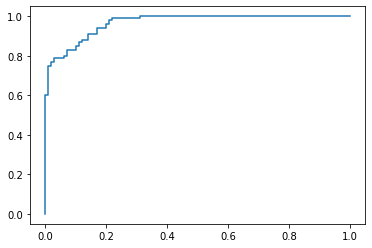

In [44]:
plt.plot(fpr,tpr)

In [45]:
thr

array([1.98490965, 0.98490965, 0.78424821, 0.78240275, 0.71912326,
       0.71862608, 0.69885372, 0.68911704, 0.67813017, 0.66249363,
       0.6550972 , 0.64957328, 0.60006551, 0.55990493, 0.54384135,
       0.53883598, 0.51985491, 0.5174775 , 0.50871741, 0.50155078,
       0.47645532, 0.45260031, 0.4367996 , 0.42286898, 0.41547518,
       0.41011098, 0.39220492, 0.38153853, 0.37576448, 0.34235629,
       0.33191891, 0.02090224])

In [46]:
fpr

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.06, 0.06,
       0.07, 0.07, 0.1 , 0.1 , 0.11, 0.11, 0.12, 0.12, 0.14, 0.14, 0.17,
       0.17, 0.2 , 0.2 , 0.21, 0.21, 0.22, 0.22, 0.31, 0.31, 1.  ])

In [47]:
tpr

array([0.  , 0.01, 0.6 , 0.6 , 0.75, 0.75, 0.77, 0.77, 0.79, 0.79, 0.8 ,
       0.8 , 0.83, 0.83, 0.85, 0.85, 0.87, 0.87, 0.88, 0.88, 0.91, 0.91,
       0.94, 0.94, 0.96, 0.96, 0.98, 0.98, 0.99, 0.99, 1.  , 1.  ])